# For one hand (working)

,x,y,z,point_id,photo_id,is_right
0,304,527,0,0,1,1
1,244,465,-34,1,1,1
2,195,384,-53,2,1,1
3,151,323,-72,3,1,1
4,103,290,-91,4,1,1
5,278,282,-23,5,1,1
6,272,191,-44,6,1,1
7,272,136,-63,7,1,1
8,273,88,-80,8,1,1
9,334,283,-26,9,1,1


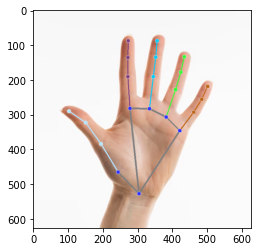

In [3]:
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green




# STEP 1: Load the input image.
image = mp.Image.create_from_file("images/image1.jpeg")
annotated_image = image.numpy_view()


resolution_x, resolution_y = image.width, image.height

# STEP 2: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import pandas as pd

# STEP 3: Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

# STEP 4: Detect hand landmarks from the input image.
detection_result = detector.detect(image)

hand_landmarks_list = detection_result.hand_landmarks
handedness_list = detection_result.handedness


# STEP 5: Detect hand landmarks on the input image.
hand_info = {}
coordinates = []
for landmark in hand_landmarks_list[0]:
    coord_x, coord_y, coord_z = int(landmark.x * resolution_x), int(landmark.y * resolution_y), int(landmark.z * resolution_x)
    coordinates.append([coord_x, coord_y, coord_z])
    hand_info["coordinates"] = coordinates

hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
hand_landmarks_proto.landmark.extend([
    landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks_list[0]
])

# STEP 6: Draw the handedness info on the input image.
solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())
plt.imshow(annotated_image);

# STEP 7: Create a Pandas DataFrame with the coordinates of the hand landmarks.
for point in coordinates:
    hand1 = pd.DataFrame(coordinates, columns=['x', 'y', 'z'])
hand1 = hand1.rename(index={'x': 'hand1_x', 'y': 'hand1_y', 'z': 'hand1_z'})
hand1['point_id'] = range(0, len(hand1))
hand1['photo_id'] = '1'
if handedness_list[0][0].category_name == 'Right': hand1['is_right'] = 1
hand1.head(20)

# For more hands (in progress)

In [35]:
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import pandas as pd

MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54)  # vibrant green

# STEP 1: Load the input image.
image = mp.Image.create_from_file("images/image5.jpeg")
annotated_image = image.numpy_view()

resolution_x, resolution_y = image.width, image.height

# STEP 2: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 3: Create a HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='files/hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options, num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

# STEP 4: Detect hand landmarks from the input image.
detection_result = detector.detect(image)

hand_info = {'coordinates': []}

for idx in range(len(detection_result.hand_landmarks)):
    hand_landmarks = detection_result.hand_landmarks[idx]
    handedness = detection_result.handedness[idx]

    coordinates = []
    for landmark in hand_landmarks:
        coord_x, coord_y, coord_z = int(landmark.x * resolution_x), int(landmark.y * resolution_y), int(
            landmark.z * resolution_x)
        coordinates.append([coord_x, coord_y, coord_z])

    hand_info['coordinates'].extend(coordinates)

    for point in hand_info['coordinates']:
        cv2.circle(annotated_image, (point[0], point[1]), 5, (255, 0, 0), -1)

# Now, you have a 'hand_info' dictionary with all coordinates in the same list.

# Create a single Pandas DataFrame with all coordinates.
df = pd.DataFrame(hand_info['coordinates'], columns=['x', 'y', 'z'])
df['point_id'] = range(len(df))
df['photo_id'] = 1
df['is_right'] = 1 if handedness[0].category_name == 'Right' else 0


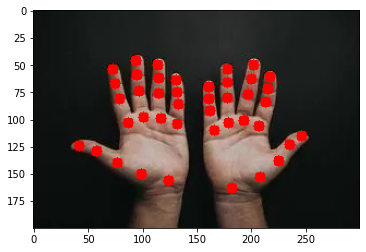

In [36]:
plt.imshow(annotated_image);

In [32]:
df

,x,y,z,point_id,photo_id,is_right
0,182,163,0,0,1,1
1,208,153,-7,1,1,1
2,225,138,-7,2,1,1
3,235,123,-8,3,1,1
4,246,115,-8,4,1,1
5,207,106,0,5,1,1
6,213,84,-2,6,1,1
7,215,72,-7,7,1,1
8,217,61,-11,8,1,1
9,193,101,0,9,1,1


# Multiple hands multiple images

In [10]:
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import os

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green

images = # read images on the folder. path = 'images/'
img_count = 0
for image in images:
    # STEP 1: Load the input image.
    image = mp.Image.create_from_file("images/image.jpeg")
    annotated_image = image.numpy_view()


    resolution_x, resolution_y = image.width, image.height

    # STEP 2: Import the necessary modules.
    import mediapipe as mp
    from mediapipe.tasks import python
    from mediapipe.tasks.python import vision
    import pandas as pd

    # STEP 3: Create an HandLandmarker object.
    base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
    options = vision.HandLandmarkerOptions(base_options=base_options,
                                        num_hands=2)
    detector = vision.HandLandmarker.create_from_options(options)

    hand_count = 0
    
    images = os.listdir('images/')

    for image in images:

        # STEP 4: Detect hand landmarks from the input image.
        detection_result = detector.detect(image)

        hand_landmarks_list = detection_result.hand_landmarks
        handedness_list = detection_result.handedness

        for idx in range(len(hand_landmarks_list)):
            hand_landmarks = hand_landmarks_list[idx]
            handedness = handedness_list[idx]

            # STEP 5: Detect hand landmarks on the input image.
            hand_info = {}
            coordinates = []
            for landmark in hand_landmarks:
                coord_x, coord_y, coord_z = int(landmark.x * resolution_x), int(landmark.y * resolution_y), int(landmark.z * resolution_x)
                coordinates.append([coord_x, coord_y, coord_z])
                hand_info["coordinates"] = coordinates

            hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
            hand_landmarks_proto.landmark.extend([
                landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks_list[0]
            ])

            # STEP 6: Draw the handedness info on the input image.
            solutions.drawing_utils.draw_landmarks(
                annotated_image,
                hand_landmarks_proto,
                solutions.hands.HAND_CONNECTIONS,
                solutions.drawing_styles.get_default_hand_landmarks_style(),
                solutions.drawing_styles.get_default_hand_connections_style())
            plt.imshow(annotated_image);





        # for every image = photo_id = img_count
        # for every hand for image, if just one hand, then hand_id = 0, else, hand_id = 0 or 1


        # STEP 7: Create a Pandas DataFrame with the coordinates of the hand landmarks.
            for point in coordinates:
                dataframe = pd.DataFrame(coordinates, columns=['x', 'y', 'z'])
            dataframe = dataframe.rename(index={'x': 'hand1_x', 'y': 'hand1_y', 'z': 'hand1_z'})
            dataframe['point_id'] = range(0, len(dataframe))
            dataframe['photo_id'] = hand_count
            dataframe['is_right'] = 1 if handedness[0].category_name == 'Right' else 0
            dataframe.head(20)


        hand_count += 1

SyntaxError: invalid syntax (3234096594.py, line 15)